# Validation of Binary Sampling Data

To validate our method for liquid sampling, we sample a binary system of polyol and CO2 and compare the measured solubility at two different pressures with the measurements made in the Di Maio lab for the same polyol (VORANOL 2110B/1k2f).

In [9]:
import pandas as pd
import numpy as np

from timedate import TimeDate
import tern
import experiment
import plot

from importlib import reload
reload(experiment)

<module 'experiment' from 'C:\\Users\\Andy.DESKTOP-CFRG05F\\OneDrive - California Institute of Technology\\Documents\\Research\\Kornfield\\ANALYSIS\\ternary_system\\experiment.py'>

## Experimental Setup

Below, we define the parameters of the setup of this experiment.

In [10]:
##### initialize experiment
p_tank = 830
m_poly = 154.2 # [g]
m_c5 = 0
m_impurities = 0
rho_poly = 1.02 # [g/mL]
V = 1200 # volume of the Parr reactor [mL]; read from manual
p_isco = 851 # [psi] what's the offset? what's the pressure in the co2 tank?
T_isco = 21 # [C]
V_isco = 416 # [mL]
timedate_0 = TimeDate(date_str='09/27/2019', time_str='16:30:00')

exp = experiment.Experiment(m_poly, m_c5, m_impurities, V, p_isco, T_isco, V_isco, timedate_0)

## Load Measurements

Below we load the parameters of each measurement.

In [11]:
pa_f_co2 = [5.6E5, 3.2E7, 4.6E7, 4.49E7, 4.45E7, -1, 4.69E7, -1, 1.35E8, 1.33E8, 1.45E8,
           1.58E8, -1, 1.65E8]
pa_f_c5 = np.zeros([len(pa_f_co2)])
pa_b_co2 = [1.3E7, 7.81E6, 6.46E6, 5.86E6, 5.47E6, -1, 5.47E6, -1, 4.67E6, 6.24E7, 6.29E7,
           6.08E7, -1, 6.27E7]
pa_b_c5 = np.zeros([len(pa_b_co2)])
p_parr = [250, 250, 250, 250, 245, 810, 810, 810, 810, 800, 800, 760, 760, 750]
T = [37, 37, 37, 35, 35, 37, 37, 37, 40, 36, 36, 39, 38, 37]
V_isco = [361, 361, 361, 361, 508, 172.8, 172.8, 172.8, 172.8, 172.8, 172.8, 172.8, 172.8, 172.8]
p_isco = [851, 851, 851, 851, 851, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
just_pressurized = [True, False, False, False, False, True, False, False, False, False, False,
                   False, False, False]
timedate = [TimeDate(date_str='09/30/2019', time_str='11:14:14'),
            TimeDate(date_str='09/30/2019', time_str='11:22:55'),
           TimeDate(date_str='09/30/2019', time_str='11:30:33'),
           TimeDate(date_str='09/30/2019', time_str='11:39:13'),
           TimeDate(date_str='09/30/2019', time_str='11:47:43'),
           TimeDate(date_str='09/30/2019', time_str='13:34:25'),
           TimeDate(date_str='09/30/2019', time_str='13:41:14'),
           TimeDate(date_str='09/30/2019', time_str='15:14:30'),
           TimeDate(date_str='09/30/2019', time_str='15:20:08'),
           TimeDate(date_str='09/30/2019', time_str='16:19:36'),
           TimeDate(date_str='09/30/2019', time_str='16:28:13'),
           TimeDate(date_str='10/01/2019', time_str='8:36:30'),
           TimeDate(date_str='10/01/2019', time_str='8:47:50'),
           TimeDate(date_str='10/01/2019', time_str='8:58:04')]

for i in range(len(pa_f_co2)):
    meas = experiment.Measurement(exp, pa_f_co2[i], pa_f_c5[i], pa_b_co2[i], pa_b_c5[i], 
                                  p_parr[i], T[i], V_isco[i], timedate[i], p_isco=p_isco[i], 
                                  just_pressurized=just_pressurized[i])

# Demonstrate the Equilibrium Was Reached

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


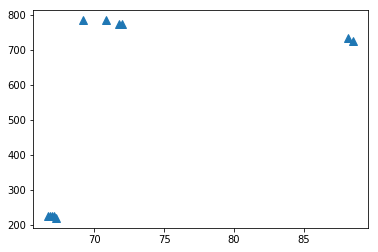

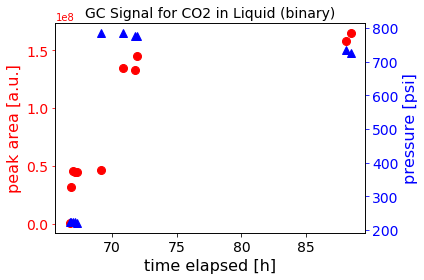

In [20]:
import matplotlib.pyplot as plt

# demonstration
is_error = np.array([m.is_error for m in exp.measurement_list])
df = exp.to_df()
inds = np.logical_not(is_error)
plt.plot((df['elapsed time [min]'].to_numpy(dtype=float)[inds])/60, 
#          df['peak area (front) co2 [a.u.]'].to_numpy(dtype=float)[inds], 
            df['pressure [psi]'].to_numpy(dtype=float)[inds], 
         '^', lw=0, ms=8)
plot.plot_two_axes(x=(df['elapsed time [min]'].to_numpy(dtype=float)[inds])/60, 
         y1=df['peak area (front) co2 [a.u.]'].to_numpy(dtype=float)[inds], 
            y2=df['pressure [psi]'].to_numpy(dtype=float)[inds], labels=['peak area', 'p'],
                  xlabel='time elapsed [h]', ylabels=['peak area [a.u.]', 'pressure [psi]'],
                  title='GC Signal for CO2 in Liquid (binary)', t_fs=14)